In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("marital status.csv")

In [ ]:
df.shape

(20, 2)

In [ ]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [ ]:
df.isnull().sum()

age       0
status    1
dtype: int64

In [ ]:
fill= df['status'].median()

In [ ]:
fill

0.0

In [ ]:
df.status = df.status.fillna(fill)

In [ ]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [ ]:
df.isnull().sum()

age       0
status    0
dtype: int64

In [ ]:
df['status'].value_counts()

0.0    11
1.0     9
Name: status, dtype: int64

In [ ]:
X = df[['age']]

In [ ]:
X

,age
0,21
1,33
2,24
3,28
4,17
5,33
6,23
7,30
8,29
9,22


In [ ]:
y= df['status']

In [ ]:
y

0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
5     1.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    1.0
19    1.0
Name: status, dtype: float64

In [ ]:
X=df[['age']].values
y=df['status']

Text(0.5, 1.0, 'Maritial status prediction')

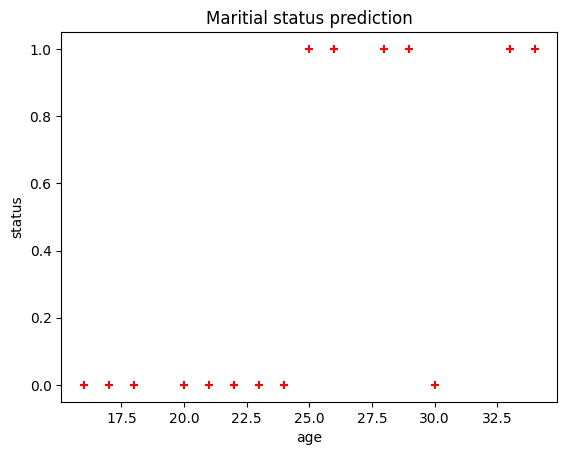

In [ ]:
plt.scatter(X,y, marker='+',color='red')
plt.xlabel("age")
plt.ylabel("status")
plt.title("Maritial status prediction")

In [ ]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [ ]:
#Train Model
from sklearn.linear_model import LogisticRegression
r=LogisticRegression()
r.fit(X_train, y_train)

#predict
pred=r.predict(X_test)

In [ ]:
r.score(X_test,y_test)

0.8333333333333334

In [ ]:
r.predict_proba(X_test)

array([[0.28697051, 0.71302949],
       [0.9902967 , 0.0097033 ],
       [0.80161052, 0.19838948],
       [0.50311753, 0.49688247],
       [0.71810555, 0.28189445],
       [0.02465085, 0.97534915]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [ ]:
accuracy_score(y_test,pred)

0.8333333333333334

In [ ]:
cnf_matrix=confusion_matrix(y_test,pred)
cnf_matrix

array([[3, 0],
       [1, 2]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



Text(0.5, 427.9555555555555, 'Predicted label')

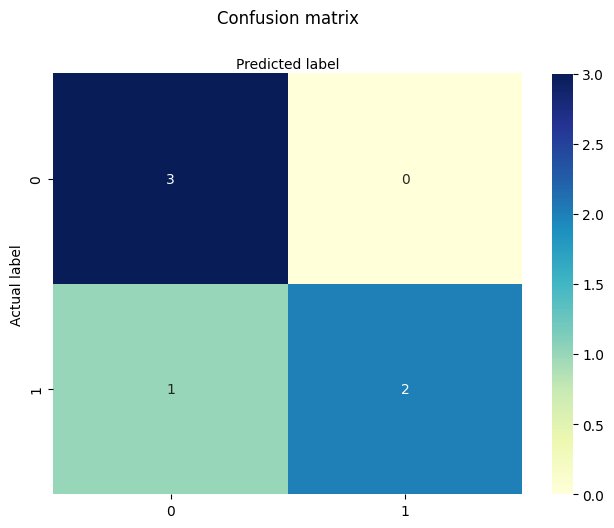

In [ ]:
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')